<a href="https://colab.research.google.com/github/Tenchi-t/Algoritmo-De-Optimizacion--2024/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_Frederic_%C3%81lvez_Mart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Frederic Álvez Martínez  <br>
Url: https://github.com/Tenchi-t/Algoritmo-De-Optimizacion--2024<br>
Google Colab: https://colab.research.google.com/drive/19yZZHdc_0X88MG0tA5cp7q40sSGY8lfh <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de una jornada de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:(copiar enunciado)

## Problema 3. Generación de Tribunales(I)
>1. Se precisa configurar tribunales de evaluación para un grupo de 15 alumnos que desean
presentar su Trabajo Fin de Máster (TFM).
>2. Cada tribunal está compuesto por tres profesores, cada uno desempeñando uno de los
siguientes roles: Presidente, Secretario o Vocal.
>3. Los profesores han indicado su disponibilidad horaria para participar en los tribunales de 15h a
21h durante la semana del 15 al 19 de abril:

Número de profesores : 10

Número de tribunales : 15

Disponibilidad/Roles : https://bit.ly/41QWk8o
- 1 indica que profesor tiene disponibilidad
- 0 en caso contrario

* Hay 15 alumnos, por lo que se deben configurar 15 tribunales buscando la configuración más
equilibrada posible en cuanto a la cantidad de tribunales asignados a cada profesor, es decir,
evitando que un profesor tenga muchos tribunales y otros pocos.
* Obviamente ningún profesor puede asistir a dos tribunales a la misma fecha/hora y no puede ser
convocado a un tribunal al que no tiene disponibilidad.

### Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

## Respuestas y código:

Librerias

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import math
import random

Lectura y estructuración de los datos

In [ ]:
# Ruta del archivo Excel
archivo = 'Datos problema de Tribunales(Algoritmos de Optimización).xlsx'

# Leer la hoja 'disponibilidad' con dos filas de cabecera
disponibilidad = pd.read_excel(archivo, sheet_name='disponibilidad', header=[0, 1])

# Leer la hoja 'roles' con una fila de cabecera
roles = pd.read_excel(archivo, sheet_name='roles', header=0)
# Mostrar las primeras las filas de cada hoja
print(disponibilidad)
print(roles)
#Cambiamos la forma de los estructura de los datos de roles para trabajar mejor
# Crear una matriz de roles (10 profesores x 3 roles)
num_profesores=roles.shape[0]
roles_matriz = np.zeros((num_profesores, 3), dtype=int)
roles_df = pd.DataFrame(roles_matriz, columns=['Presidente', 'Secretario', 'Vocal'])

# Procesar la información de roles
for i in range(num_profesores):
    partes = roles.iloc[i, -1].strip().split(',')
    # Asignar 1 para cada rol que el profesor puede desempeñar
    if 'P' in partes:
        roles_df.loc[i , 'Presidente'] = 1
    if 'S' in partes:
        roles_df.loc[i , 'Secretario'] = 1
    if 'V' in partes:
        roles_df.loc[i , 'Vocal'] = 1

# Ahora roles_df tiene la estructura correcta para usarse en las restricciones
print(roles_df)

                   #           Dia 15                   16  ... 18       19  \
  Unnamed: 0_level_1 Profesor/Hora 15 16 17 18 19 20 21 15  ... 19 20 21 15   
0                  1           RRD  0  1  1  1  0  1  1  1  ...  1  1  1  1   
1                  2           QYV  1  1  1  1  0  0  0  0  ...  1  1  1  1   
2                  3           LHL  0  0  1  1  0  1  1  1  ...  1  0  1  0   
3                  4           HLC  1  0  1  0  1  1  0  1  ...  0  1  1  1   
4                  5           MSB  1  1  0  1  0  1  1  1  ...  0  1  1  1   
5                  6           PMQ  1  1  1  1  1  0  0  1  ...  0  1  1  1   
6                  7           QWF  0  1  1  1  1  1  1  1  ...  0  1  1  1   
7                  8           EBB  1  1  1  1  1  0  0  1  ...  1  1  1  0   
8                  9           IOE  1  0  1  1  0  1  0  0  ...  1  1  0  1   
9                 10           IOA  1  1  0  1  1  0  1  1  ...  1  1  1  1   

                     
  16 17 18 19 20 21  
0  1  1

## ¿Como represento el espacio de soluciones?
El espacio de soluciones se puede representarse de forma **compacta** como:

Representando las soluciones como una array $ x_{r,t}=p $, donde las filas representa los roles con la última fila la fecha\hora (r) y las columnas los n-tribunal (t) por último las celdas son los profesores asignados quitando la última fila que es la fecha\hora (p)

Ejemplo:
{0: {'fecha': 31, 'P': 1, 'S': 7, 'V': 2, 2: 3, 0: 9, 1: 5}, 1: {'fecha': 11, 'P': 1, 'S': 5, 'V': 8}, 2: {'fecha': 3, 'P': 9, 'S': 4, 'V': 7, 0: 5, 2: 0}, 3: {'fecha': 33, 'P': 0, 'S': 6, 'V': 8, 2: 1, 1: 3, 0: 4},

4: {'fecha': 23, 'P': 8, 'S': 6, 'V': 2, 2: 9, 1: 3, 0: 1}, 5: {'fecha': 6, 'P': 9, 'S': 7, 'V': 3, 1: 5}, 6: {'fecha': 22, 'P': 5, 'S': 7, 'V': 4, 1: 6, 2: 2, 0: 8}, 7: {'fecha': 28, 'P': 9, 'S': 5, 'V': 3, 0: 0, 1: 6, 2: 7},

8: {'fecha': 16, 'P': 4, 'S': 1, 'V': 5, 1: 8, 2: 9}, 9: {'fecha': 32, 'P': 9, 'S': 7, 'V': 6, 0: 8, 2: 0, 1: 3}, 10: {'fecha': 25, 'P': 4, 'S': 3, 'V': 2, 1: 5, 0: 8, 2: 1}, 11: {'fecha': 5, 'P': 9, 'S': 6, 'V': 2, 0: 0, 1: 1, 2: 7},

12: {'fecha': 16, 'P': 2, 'S': 7, 'V': 0, 2: 8, 0: 9}, 13: {'fecha': 3, 'P': 5, 'S': 6, 'V': 1, 0: 0}, 14: {'fecha': 11, 'P': 4, 'S': 0, 'V': 2}}


## ¿Cual es la función objetivo?

Como el objetivo es equilibrar la carga de trabajo de los profesores, minimizando la diferencia entre el máximo y el mínimo de tribunales asignados a cada profesor.

Definimos lo siguiente:

- $y_p = \sum_{t=1}^{15} \sum_{r \in \{P, S, V\}} x_{r,t}==p $: Número total de tribunales asignados al profesor $p$.

La función objetivo a minimizar será:

$$
loss(x)=\min \left( \max(y_p) - \min(y_p) \right) \quad \forall p \in \{1, \ldots, 10\}
$$


In [ ]:
# Esta es nuestra función de costo, calculamos la diferencia entre el máximo y el mínimo número de tribunales asignados
def calcular_energia(asignacion, num_profesores=10):
    carga_profesor = np.zeros(num_profesores)
    # Contar los tribunales asignados a cada profesor sin considerar la fecha
    for tribunal in asignacion.values():
        for rol, profesor in tribunal.items():
            if rol != 'fecha':  # Evitar la clave 'fecha'
                carga_profesor[profesor] += 1

    # Mínimo y máximo número de tribunales asignados
    max_carga = carga_profesor.max()
    min_carga = carga_profesor.min()
    # Penalización por desequilibrio, la diferencia entre el máximo y el mínimo
    energia = max_carga - min_carga
    return energia

## ¿Como implemento las restricciones?

Veamos cada caso:

### a) Restricción de disponibilidad horaria:

Usamos la matriz de disponibilidad fecha $ D_{p,f}$ (extraída del archivo proporcionado), donde:

$$
D_{p,f} = \begin{cases}
1 & \text{si el profesor } p \text{ está disponible para fecha } f \\
0 & \text{en caso contrario}
\end{cases}
$$


### b) Asignación completa de roles en cada tribunal y exclusividad de los roles por profesor y tribunal:

Cada tribunal debe tener exactamente un Presidente, un Secretario y un Vocal, esto queda perfectamente determinado con la estructura que hemos selecionado para representar las soluciones, da tal forma que solo puede cada rol tener un profesor y no puede ser vacio.

$$
x_{V,t} \neq x_{S,t} \neq x_{P,t} \neq \empty \quad \forall t
$$

### c) No solapamiento de tribunales:

Asumiendo que los tribunales pueden coincidir en horarios, un profesor no puede estar en dos tribunales al mismo tiempo:

$$
x_{Fecha,t} \neq x_{Fecha,s}  \quad \forall t, s, s \neq t, \text{siendo s y t tribunales.}
$$

### d) Disponibilidad de rol:

Usamos la matriz de disponibilidad de rol $ R_{p,r}$ (extraída del archivo proporcionado), donde:

$$
R_{p,r} = \begin{cases}
1 & \text{si el profesor } p \text{ está disponible para rol } r \\
0 & \text{en caso contrario}
\end{cases}
$$


In [ ]:
#Disponibilidad de un profesor sino se repite fecha y hora dentro de los tribunales ya asignados
def profesores_asignados_en_fecha(asignacion, fecha):
    return [
        profesor
        for asignacion in asignacion.values()
        if asignacion['fecha'] == fecha
        for profesor in [asignacion.get('P', -1), asignacion.get('S', -1), asignacion.get('V', -1)]    ]
# Disponibilidad de un profsor con toda las restriciones
def profesores_disponibilidad(asignacion,tribunal,rol_idx,num_profesores, profesores_asignados_por_fecha,fecha):
    return  [
                    i for i in range(num_profesores)
                    if disponibilidad.iloc[i, fecha] == 1  # Disponibilidad horaria
                    and roles_df.iloc[i, rol_idx] == 1  # Puede desempeñar el rol
                    and i not in profesores_asignados_por_fecha # No asignado en la misma fecha
                    and i not in asignacion[tribunal].values()  # No asignado en este tribunal
                ]

In [ ]:
# Función de asignación inicial
def crear_asignacion_inicial(disponibilidad,roles_df,num_tribunales=15):
    asignacion_inicial = {}
    fechas_disponibles = set(range(disponibilidad.shape[1]))  # Conjunto de todas las fechas disponibles

    for j in range(num_tribunales):
        todo_asignado = False  # Inicializar la condición
        while not todo_asignado:  # Continuar mientras no se haya asignado correctamente todo
            # Seleccionar una fecha aleatoria de las disponibles
            if not fechas_disponibles:
                break  # Si no hay fechas disponibles, salimos del bucle

            fecha = random.choice(list(fechas_disponibles))

            # Inicializar la asignación para este tribunal con la fecha seleccionada
            asignacion_inicial[j] = {'fecha': fecha}
            profesores_asignados_por_fecha=profesores_asignados_en_fecha(asignacion_inicial, fecha)
            todo_asignado = True  # Asumimos que todo se puede asignar correctamente

            # Asignar cada rol (P, S, V)
            for idx, rol in enumerate(['P', 'S', 'V']):
                # Filtrar profesores que:
                profesores_disponibles = [
                    i for i in range(num_profesores)
                    if disponibilidad.iloc[i, fecha] == 1  # Disponibilidad horaria
                    and roles_df.iloc[i, idx] == 1  # Puede desempeñar el rol
                    and i not in profesores_asignados_por_fecha # No asignado en la misma fecha
                    and i not in asignacion_inicial[j].values()  # No asignado en este tribunal
                ]

                # Si hay profesores disponibles, asignar uno aleatoriamente
                if profesores_disponibles:
                    profesor_asignado = random.choice(profesores_disponibles)
                    asignacion_inicial[j][rol] = profesor_asignado
                else:
                    # Si no hay profesores disponibles
                    todo_asignado = False  # Marcamos que no se ha asignado correctamente todo

            # Si no hemos podido asignar correctamente, eliminamos la fecha del conjunto
            if not todo_asignado:
                fechas_disponibles.remove(fecha)  # Eliminar la fecha saturada del conjunto

    return asignacion_inicial

In [ ]:
# Cambiar profesor más ocupado por uno menos ocupado en la misma fecha
def generar_vecino_metodo_1(asignacion, disponibilidad,roles_df):
    # Número de profesores (se puede obtener directamente del DataFrame)
    num_profesores = disponibilidad.shape[0]
    # Calcular la frecuencia de ocupación de cada profesor
    frecuencia_ocupacion = {profesor: 0 for profesor in range(num_profesores)}
    for _, roles in asignacion.items():
        for rol, profesor in roles.items():
            if rol != 'fecha':  # Evitar la clave 'fecha'
                frecuencia_ocupacion[profesor] += 1

    # Ordenar los profesores por frecuencia de ocupación (de mayor a menor)
    profesores_ordenados = sorted(frecuencia_ocupacion.items(), key=lambda x: x[1], reverse=True)
    # Seleccionar el profesor más ocupado
    profesor_mas_ocupado = profesores_ordenados[0][0]
    # Buscar tribunales donde el profesor más ocupado esté asignado en los roles 'P', 'S' o 'V'
    tribunales_con_profesor = [
        tribunal for tribunal, roles in asignacion.items()
        if profesor_mas_ocupado in [roles['P'], roles['S'], roles['V']]  # Verificar solo los roles 'P', 'S', 'V'
    ]
    # Seleccionar un tribunal aleatorio donde esté el profesor más ocupado
    tribunal_seleccionado = random.choice(tribunales_con_profesor)
    # Buscar el índice del rol que tiene asignado el profesor más ocupado en el tribunal
    rol_idx = None
    for idx, rol in enumerate(['P', 'S', 'V']):
        if asignacion[tribunal_seleccionado][rol] == profesor_mas_ocupado:
            rol_idx = idx
            break

    # Obtener la fecha del tribunal seleccionado
    fecha = asignacion[tribunal_seleccionado]['fecha']
    # Encontrar los profesores ocupados en otros tribunales en la misma fecha
    profesores_ocupados = profesores_asignados_en_fecha(asignacion, fecha)
    # Profesores disponibles para ese rol y fecha
    profesores_disponibles = [
        p for p in range(num_profesores)
        if disponibilidad.iloc[p, fecha] == 1  # Disponibilidad horaria
        and roles_df.iloc[p, rol_idx] == 1  # Puede desempeñar el rol
        and p not in profesores_ocupados  # No asignado en la misma fecha
        and p not in asignacion[tribunal_seleccionado].values()  # No asignado en este tribunal
        and p != profesor_mas_ocupado  # No es el mismo profesor que se desea cambiar
    ]

    # Ordenar los profesores disponibles por su frecuencia de ocupación (de menor a mayor) usando la frecuencia ya calculada
    profesores_disponibles_ordenados = sorted(
        profesores_disponibles,
        key=lambda p: frecuencia_ocupacion[p]
    )

    # Seleccionar el profesor menos ocupado entre los disponibles
    if profesores_disponibles_ordenados:
        nuevo_profesor = profesores_disponibles_ordenados[0]

        # Buscar el rol que tiene asignado el profesor más ocupado en el tribunal
        asignacion[tribunal_seleccionado][rol_idx] = nuevo_profesor

    return asignacion

In [ ]:
# Elija un tribunal al azar y luego una fecha al azar, y asigne a los profesores respetando los criterios en ese tribunal seleccionado
def generar_vecino_metodo_2(asignacion, disponibilidad, roles_df):
    # Seleccionar un tribunal al azar
    tribunal_seleccionado = random.choice(list(asignacion.keys()))
    # Obtener la fecha del tribunal seleccionado
    fecha = asignacion[tribunal_seleccionado]['fecha']
    # Encontrar los profesores ocupados en otros tribunales en la misma fecha
    profesores_ocupados = profesores_asignados_en_fecha(asignacion, fecha)
    # Número de profesores (se puede obtener directamente del DataFrame)
    num_profesores = disponibilidad.shape[0]
    # Asignar profesores a los roles 'P', 'S', 'V' en el tribunal seleccionado
    for rol_idx, rol in enumerate(['P', 'S', 'V']):
        # Profesores disponibles para ese rol y fecha
        profesores_disponibles = [
            p for p in range(num_profesores)
            if disponibilidad.iloc[p, fecha] == 1  # Disponibilidad horaria
            and roles_df.iloc[p, rol_idx] == 1  # Puede desempeñar el rol
            and p not in profesores_ocupados  # No asignado en la misma fecha
            and p not in asignacion[tribunal_seleccionado].values()  # No asignado en este tribunal
        ]

        # Si hay profesores disponibles, seleccionar uno al azar
        if profesores_disponibles:
            nuevo_profesor = random.choice(profesores_disponibles)
            asignacion[tribunal_seleccionado][rol] = nuevo_profesor
            # Añadir el profesor a la lista de ocupados para evitar duplicados en otros roles
            profesores_ocupados.append(nuevo_profesor)

    return asignacion

In [ ]:
# Algoritmo  "Simulated Annealing"
def simulated_annealing(asignacion_inicial, disponibilidad,roles_df,temperatura_inicial=10, factor_enfriamiento=0.95, max_iter=1000):
    asignacion = asignacion_inicial.copy()
    temperatura = temperatura_inicial
    energia_actual = calcular_energia(asignacion)

    for _ in range(max_iter):
        # Generar un vecino  metodo 2
        vecino = generar_vecino_metodo_2(asignacion.copy(), disponibilidad, roles_df)
        energia_vecino = calcular_energia(vecino)

        # Si la nueva solución es mejor, la aceptamos
        if energia_vecino < energia_actual:
            asignacion = vecino
            energia_actual = energia_vecino
        elif energia_vecino==1:#Si es el optimo global, termina
            asignacion = vecino
            energia_actual = energia_vecino
            break
        else:
            # Si es peor, aceptamos con una probabilidad que depende de la temperatura
            probabilidad = math.exp((energia_actual - energia_vecino) / temperatura)
            if random.random() < probabilidad:
                asignacion = vecino
                energia_actual = energia_vecino

        # Generar un vecino  metodo 1
        vecino =generar_vecino_metodo_1(asignacion.copy(),disponibilidad,roles_df)
        energia_vecino = calcular_energia(vecino)

        # Si la nueva solución es mejor, la aceptamos
        if energia_vecino < energia_actual:
            asignacion = vecino
            energia_actual = energia_vecino
        elif energia_vecino==1:#Si es el optimo global, termina
            asignacion = vecino
            energia_actual = energia_vecino
            break
        else:
            # Si es peor, aceptamos con una probabilidad que depende de la temperatura
            probabilidad = math.exp((energia_actual - energia_vecino) / temperatura)
            if random.random() < probabilidad:
                asignacion = vecino
                energia_actual = energia_vecino

        # Reducir la temperatura
        temperatura *= factor_enfriamiento

    return asignacion, energia_actual

# Ejecutar Simulated Annealing
asignacion_inicial=crear_asignacion_inicial(disponibilidad,roles_df,num_tribunales=15)
asignacion_optima, costo_optimo = simulated_annealing(asignacion_inicial,disponibilidad,roles_df)

# Mostrar la asignación óptima y el costo de la solución
print("Asignación Óptima Encontrada:")
print(asignacion_optima)
print(f"Costo de la solución (diferencia entre máximo y mínimo de tribunales asignados): {costo_optimo}")

Asignación Óptima Encontrada:
{0: {'fecha': 10, 'P': 4, 'S': 5, 'V': 6, 1: 1, 0: 2}, 1: {'fecha': 11, 'P': 0, 'S': 1, 'V': 2, 1: 4, 0: 8}, 2: {'fecha': 10, 'P': 1, 'S': 7, 'V': 8, 0: 2}, 3: {'fecha': 13, 'P': 1, 'S': 5, 'V': 3, 2: 6, 0: 0, 1: 4}, 4: {'fecha': 20, 'P': 5, 'S': 9, 'V': 1}, 5: {'fecha': 15, 'P': 4, 'S': 9, 'V': 2, 0: 0, 1: 3, 2: 5}, 6: {'fecha': 30, 'P': 4, 'S': 1, 'V': 3, 1: 8, 0: 0, 2: 5}, 7: {'fecha': 20, 'P': 0, 'S': 3, 'V': 2}, 8: {'fecha': 5, 'P': 1, 'S': 0, 'V': 6, 2: 2, 0: 9, 1: 8}, 9: {'fecha': 4, 'P': 8, 'S': 6, 'V': 3, 0: 1, 2: 2, 1: 5}, 10: {'fecha': 28, 'P': 5, 'S': 7, 'V': 3, 0: 8, 1: 0}, 11: {'fecha': 28, 'P': 0, 'S': 9, 'V': 6, 0: 5, 1: 7}, 12: {'fecha': 16, 'P': 0, 'S': 1, 'V': 2, 1: 5, 2: 7, 0: 9}, 13: {'fecha': 3, 'P': 5, 'S': 6, 'V': 9, 2: 7, 0: 1, 1: 0}, 14: {'fecha': 22, 'P': 8, 'S': 3, 'V': 2, 0: 9, 2: 5, 1: 7}}
Costo de la solución (diferencia entre máximo y mínimo de tribunales asignados): 1.0


Las soluciones óptimas globales deben ser de coste 1 (si las hay), según lo especificado en el problema.

Asignación Óptima Encontrada:
{0: {'fecha': 31, 'P': 1, 'S': 7, 'V': 2, 2: 3, 0: 9, 1: 5}, 1: {'fecha': 11, 'P': 1, 'S': 5, 'V': 8}, 2: {'fecha': 3, 'P': 9, 'S': 4, 'V': 7, 0: 5, 2: 0}, 3: {'fecha': 33, 'P': 0, 'S': 6, 'V': 8, 2: 1, 1: 3, 0: 4},

4: {'fecha': 23, 'P': 8, 'S': 6, 'V': 2, 2: 9, 1: 3, 0: 1}, 5: {'fecha': 6, 'P': 9, 'S': 7, 'V': 3, 1: 5}, 6: {'fecha': 22, 'P': 5, 'S': 7, 'V': 4, 1: 6, 2: 2, 0: 8}, 7: {'fecha': 28, 'P': 9, 'S': 5, 'V': 3, 0: 0, 1: 6, 2: 7},

8: {'fecha': 16, 'P': 4, 'S': 1, 'V': 5, 1: 8, 2: 9}, 9: {'fecha': 32, 'P': 9, 'S': 7, 'V': 6, 0: 8, 2: 0, 1: 3}, 10: {'fecha': 25, 'P': 4, 'S': 3, 'V': 2, 1: 5, 0: 8, 2: 1}, 11: {'fecha': 5, 'P': 9, 'S': 6, 'V': 2, 0: 0, 1: 1, 2: 7},

12: {'fecha': 16, 'P': 2, 'S': 7, 'V': 0, 2: 8, 0: 9}, 13: {'fecha': 3, 'P': 5, 'S': 6, 'V': 1, 0: 0}, 14: {'fecha': 11, 'P': 4, 'S': 0, 'V': 2}}

Costo de la solución (diferencia entre máximo y mínimo de tribunales asignados): 1.0

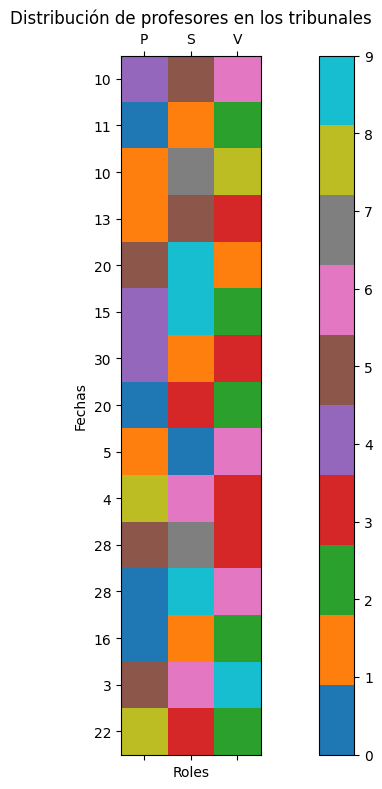

In [ ]:
import matplotlib.pyplot as plt

# Convertir los datos en un DataFrame para facilitar el manejo
tribunales_df = pd.DataFrame.from_dict(asignacion_optima, orient='index')
# Crear un gráfico de calor (heatmap) de los tribunales
fig, ax = plt.subplots(figsize=(12, 8))
# Mostrar las asignaciones P, S, V para cada tribunal con la fecha
tribunales_matrix = tribunales_df[['P', 'S', 'V']].values
paleta_cualitativa = plt.get_cmap('tab10')  # Puedes cambiar 'Set3' por otra paleta cualitativa
# Crear un mapa de calor con la paleta cualitativa
cax = ax.matshow(tribunales_matrix, cmap=paleta_cualitativa)
# Añadir etiquetas de los ejes
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['P', 'S', 'V'])
# Usar las fechas como etiquetas del eje y
ax.set_yticks(np.arange(len(tribunales_df)))
ax.set_yticklabels(tribunales_df['fecha'])  # Aquí se usan las fechas
# Añadir la barra de color
fig.colorbar(cax)
# Título y etiquetas
ax.set_title('Distribución de profesores en los tribunales')
ax.set_xlabel('Roles')
ax.set_ylabel('Fechas')  # Cambiamos la etiqueta del eje y
# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Análisis
## ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

### **Orden de Complejidad:**  
El problema tiene **complejidad exponencial**, ya que el espacio de soluciones crece de manera combinatoria con el número de tribunales, profesores y franjas horarias.

Para este ejemplo:  
- Hay **30 franjas horarias** (5 días × 6 horas/día de 15h a 21h).  
- Cada tribunal requiere **3 role** con **10 profesores** disponibles sin repeticion en roles, esto es un problema de combinatoria que crece factorial.  
- Al escalar a 15 tribunales, las opciones se multiplican exponencialmente.


### **Tamaño del Espacio de Soluciones:**  
1. **Sin restricciones** (ignorando disponibilidad y solapamientos):  
   - Cada tribunal elige una franja horaria (30 opciones) y 3 profesores con roles específicos (combinaciones de $P(10,3) = 10 \times 9 \times 8 = 720$.  
   - Para 15 tribunales: $ (30 \times 720)^{15} \approx 10^{75} $.  

2. **Con restricciones** (franjas únicas y profesores no repetidos por hora):  
   - Seleccionar 15 franjas de 30: $ \binom{30}{15} \approx 1.5 \times 10^8 $.  
   - Asignar 3 profesores distintos por tribunal (6 permutaciones por tribunal): $ 6^{15} \approx 4.7 \times 10^{11} $.  
   - Total: $ \approx 7.3 \times 10^{19} $ combinaciones.  


# Diseño
## ¿Que técnica utilizo? ¿Por qué?

**Técnica utilizada:**  
He utilizado el **recocido simulado (Simulated Annealing)** combinado con una **búsqueda en vecindad** para resolver este problema.

**Las razones son:**  

1. **Naturaleza del problema:**  
   - Para este problema el espacio de busqueda es alto y con múltiples óptimos locales, para ello necesitaba una técnica que pudiera escapar de estos óptimos locales y explorar el espacio de soluciones de manera eficiente.

2. **Recocido simulado:**  
   - Como el recocido simulado es un algoritmo metaheurístico que nos permite explorar el espacio de soluciones de manera inteligente, aceptando soluciones peores con una probabilidad decreciente (controlada por una "temperatura"), con esto nos ayuda a evitar quedar atrapado en óptimos locales.  
   - El espacio de soluciones es grande y no se conoce una estructura clara que permita aplicar métodos exactos y eficientes.  
   - La complejidad es relativamente baja en comparación con otros métodos de optimización global, lo que lo hace adecuado para problemas de tamaño moderado a grande.

3. **Búsqueda en vecindad:**  
   - La búsqueda en vecindad es una técnica complementaria que permite explorar soluciones cercanas a la solución actual, para este problema, estaba claro que las soluciones óptimas podrían alcanzarse mediante pequeños cambios en la configuración actual,es decir, modificando la "vecindad".  
   - Esta técnica es eficiente porque se enfoca en mejorar la solución actual sin necesidad de explorar todo el espacio de búsqueda, lo que reduce el tiempo de cómputo.

4. **Ventajas de la combinación:**  
   - La combinación de recocido simulado con búsqueda en vecindad permite equilibrar la **exploración** (búsqueda de nuevas regiones del espacio de soluciones) y la **explotación** (mejora de soluciones cercanas).  
   - Esta combinación es efectiva para problemas donde las soluciones óptimas están agrupadas en regiones específicas del espacio de búsqueda, como en este caso.
